In [1]:
print("Nguyễn Nguyên Huy - 6351071030")

Nguyễn Nguyên Huy - 6351071030


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [4]:
path = "/content/drive/MyDrive/Colab Notebooks/Data Mining/Dataset/heart.csv"
heart_df = pd.read_csv(path, sep= ',')
print("Số lượng dữ liệu huấn luyện:", len(heart_df))
print(heart_df.head())

print(f"\nMissing values: {heart_df.isna().sum().sum()} (tổng)")
if heart_df.isna().sum().sum() == 0:
    print("→ Dữ liệu sạch, không có giá trị trống!")

print("\nPhân bố cột 'target':")
print(heart_df['target'].value_counts())
print(f"→ Lớp 1 (bệnh tim): {heart_df['target'].mean()*100:.1f}%")
print(f"→ Lớp 0 (khỏe): {(1 - heart_df['target'].mean())*100:.1f}%")

Số lượng dữ liệu huấn luyện: 303
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Missing values: 0 (tổng)
→ Dữ liệu sạch, không có giá trị trống!

Phân bố cột 'target':
target
1    165
0    138
Name: count, dtype: int64
→ Lớp 1 (bệnh tim): 54.5%
→ Lớp 0 (khỏe): 45.5%


In [6]:
'''
Nhập dữ liệu đầu vào và tiến hành tiền xử lý xóa các dòng dữ liệu trống, sửa tên
các cột dữ liệu lại như sau để dễ theo dõi: 'age', 'sex', 'chest_pain_type',
'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope',
'num_major_vessels', 'thalassemia', 'target'.
'''
new_column_names = {
    'age': 'age',
    'sex': 'sex',
    'cp': 'chest_pain_type',
    'trestbps': 'resting_blood_pressure',
    'chol': 'cholesterol',
    'fbs': 'fasting_blood_sugar',
    'restecg': 'rest_ecg',
    'thalach': 'max_heart_rate_achieved',
    'exang': 'exercise_induced_angina',
    'oldpeak': 'st_depression',
    'slope': 'st_slope',
    'ca': 'num_major_vessels',
    'thal': 'thalassemia',
    'target': 'target'
}

heart_df = heart_df.rename(columns=new_column_names)

print(f"\nĐÃ ĐỔI TÊN CỘT THÀNH CÔNG!")
print("Các cột mới:")
print(heart_df.columns.tolist())

print(f"\n5 dòng đầu sau tiền xử lý:")
display(heart_df.head())

print(f"\nThông tin dữ liệu:")
heart_df.info()

print(f"\nPhân bố nhãn 'target':")
print(heart_df['target'].value_counts())
print(f"→ Lớp 1 (bệnh tim): {heart_df['target'].mean()*100:.1f}%")
print(f"→ Lớp 0 (khỏe): {(1 - heart_df['target'].mean())*100:.1f}%")


ĐÃ ĐỔI TÊN CỘT THÀNH CÔNG!
Các cột mới:
['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

5 dòng đầu sau tiền xử lý:


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1



Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: flo

Đang khảo sát tương quan trên 13 cột số...
Các cột được xét:
['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia']


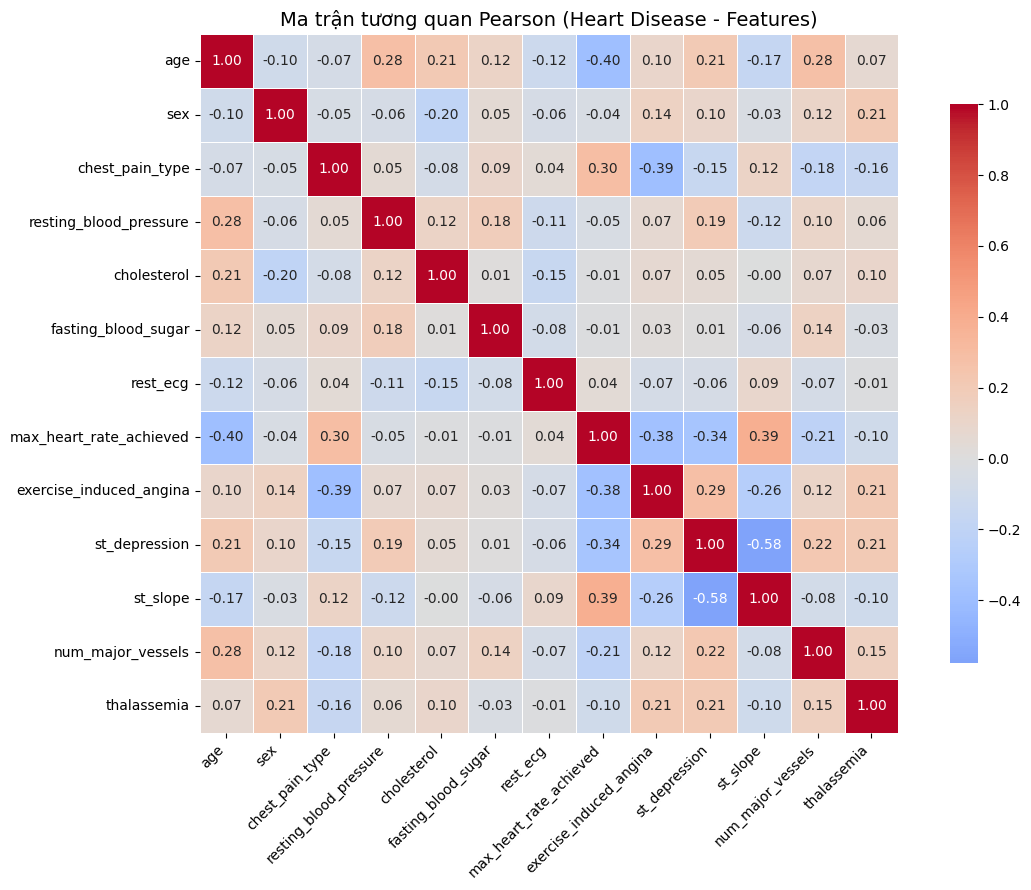


Các cặp cột có |Pearson| ≥ 0.6:
  Không có cặp nào vượt ngưỡng!

Các cột sẽ bị loại bỏ: []

Sau khi loại bỏ:
→ Còn lại 14 cột (từ 14)
→ Dữ liệu: 303 mẫu

ĐÃ CẬP NHẬT!
X_clean shape: (303, 13)
Các cột còn lại:
['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia']


In [8]:
'''
Khảo sát độ tương đồng giữa các cột với nhau bằng công thức Pearson. Những cột
nào có giá trị tương đồng cao thì hãy loại bỏ.
'''
X = heart_df.drop('target', axis=1)

print(f"Đang khảo sát tương quan trên {X.shape[1]} cột số...")
print("Các cột được xét:")
print(X.columns.tolist())

corr_matrix = X.corr(method='pearson')

plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            linewidths=0.5,
            cbar_kws={'shrink': 0.8},
            square=True)
plt.title("Ma trận tương quan Pearson (Heart Disease - Features)", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

threshold = 0.6
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        col1 = corr_matrix.columns[i]
        col2 = corr_matrix.columns[j]
        val = corr_matrix.iloc[i, j]
        if abs(val) >= threshold:
            high_corr_pairs.append((col1, col2, round(val, 3)))

print(f"\nCác cặp cột có |Pearson| ≥ {threshold}:")
if high_corr_pairs:
    for col1, col2, val in high_corr_pairs:
        print(f"  → {col1} vs {col2}: {val}")
else:
    print("  Không có cặp nào vượt ngưỡng!")

cols_to_drop = set()
for col1, col2, val in high_corr_pairs:
    drop_col = col2 if col1 < col2 else col1
    cols_to_drop.add(drop_col)

print(f"\nCác cột sẽ bị loại bỏ: {list(cols_to_drop)}")

# Loại bỏ khỏi heart_df
heart_df_clean = heart_df.drop(columns=cols_to_drop)

print(f"\nSau khi loại bỏ:")
print(f"→ Còn lại {heart_df_clean.shape[1]} cột (từ {heart_df.shape[1]})")
print(f"→ Dữ liệu: {heart_df_clean.shape[0]} mẫu")

X_clean = heart_df_clean.drop('target', axis=1)
y = heart_df_clean['target']

print(f"\nĐÃ CẬP NHẬT!")
print(f"X_clean shape: {X_clean.shape}")
print("Các cột còn lại:")
print(X_clean.columns.tolist())

In [9]:
'''
Tách các cột dữ liệu thành hai phần, một phần chứa các thuộc tính bình thường, một
phần chứa riêng thuộc tính quyết định.
'''
X = X_clean.copy()  # Đã có từ bước trước
y = heart_df_clean['target'].copy()

print("TÁCH DỮ LIỆU THÀNH CÔNG!")
print(f"→ X: chứa các thuộc tính bình thường")
print(f"→ y: chứa riêng thuộc tính quyết định ('target')")
print(f"\nX shape: {X.shape}")
print(f"y shape: {y.shape}")

print("\nPhân bố nhãn trong y:")
print(y.value_counts().sort_index())
print(f"→ Lớp 1 (bệnh tim): {y.mean()*100:.1f}%")
print(f"→ Lớp 0 (khỏe): {(1 - y.mean())*100:.1f}%")

print(f"\n5 dòng đầu của X (features):")
display(X.head())


TÁCH DỮ LIỆU THÀNH CÔNG!
→ X: chứa các thuộc tính bình thường
→ y: chứa riêng thuộc tính quyết định ('target')

X shape: (303, 13)
y shape: (303,)

Phân bố nhãn trong y:
target
0    138
1    165
Name: count, dtype: int64
→ Lớp 1 (bệnh tim): 54.5%
→ Lớp 0 (khỏe): 45.5%

5 dòng đầu của X (features):


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [10]:
'''
Chuyển đổi các cột không phải dạng số về dạng one-hot vector để phù hợp với đầu
vào của thư viện.
'''
categorical_cols = []

for col in X.columns:
    unique_vals = X[col].nunique()
    if unique_vals <= 6 and X[col].dtype in ['int64', 'float64']:  # ít giá trị → categorical
        categorical_cols.append(col)
        print(f"→ Phát hiện categorical: {col} ({unique_vals} giá trị riêng biệt)")

print(f"\nCác cột cần one-hot encoding: {categorical_cols}")

if len(categorical_cols) > 0:
    X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True, dtype=int)
    print(f"\nOne-hot encoding hoàn tất!")
    print(f"→ Trước: {X.shape[1]} cột → Sau: {X_encoded.shape[1]} cột")
else:
    X_encoded = X.copy()
    print(f"\nKhông cần one-hot → giữ nguyên X")

# Cập nhật X
X = X_encoded.copy()

non_numeric = X.select_dtypes(exclude=[np.number]).columns
assert len(non_numeric) == 0, f"Lỗi: vẫn còn cột không phải số: {non_numeric.tolist()}"

print(f"\nTẤT CẢ CỘT ĐÃ LÀ SỐ (int64) → SẴN SÀNG CHO MÔ HÌNH!")
print(f"X shape sau one-hot: {X.shape}")
print(f"Số cột mới: {X.shape[1]}")

print(f"\nĐÃ HOÀN TẤT TIỀN XỬ LÝ!")
print("Các cột hiện tại:")
print(X.columns.tolist())

→ Phát hiện categorical: sex (2 giá trị riêng biệt)
→ Phát hiện categorical: chest_pain_type (4 giá trị riêng biệt)
→ Phát hiện categorical: fasting_blood_sugar (2 giá trị riêng biệt)
→ Phát hiện categorical: rest_ecg (3 giá trị riêng biệt)
→ Phát hiện categorical: exercise_induced_angina (2 giá trị riêng biệt)
→ Phát hiện categorical: st_slope (3 giá trị riêng biệt)
→ Phát hiện categorical: num_major_vessels (5 giá trị riêng biệt)
→ Phát hiện categorical: thalassemia (4 giá trị riêng biệt)

Các cột cần one-hot encoding: ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'st_slope', 'num_major_vessels', 'thalassemia']

One-hot encoding hoàn tất!
→ Trước: 13 cột → Sau: 22 cột

TẤT CẢ CỘT ĐÃ LÀ SỐ (int64) → SẴN SÀNG CHO MÔ HÌNH!
X shape sau one-hot: (303, 22)
Số cột mới: 22

ĐÃ HOÀN TẤT TIỀN XỬ LÝ!
Các cột hiện tại:
['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'st_depression', 'sex_1', 'chest_pain_type_1', 'chest_pain_t

Chia dữ liệu thành công!
X_train: (212, 22), X_test: (91, 22)
y_train: (212,), y_test: (91,)

Đang huấn luyện cây ID3...
Huấn luyện xong!
→ Độ sâu cây: 8
→ Số node lá: 34

Accuracy của ID3: 0.8242 (82.42%)


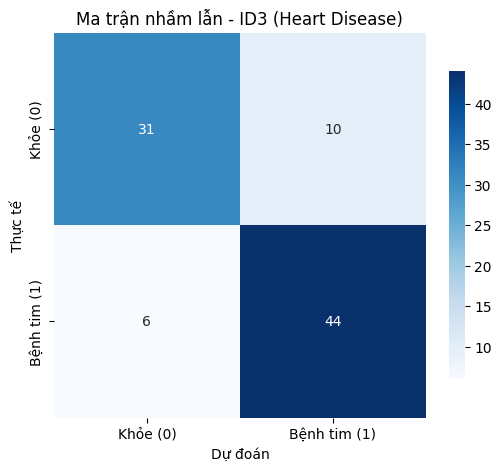


Báo cáo phân loại (ID3):
              precision    recall  f1-score   support

        Khỏe       0.84      0.76      0.79        41
    Bệnh tim       0.81      0.88      0.85        50

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91


Cấu trúc cây ID3 (3 cấp đầu):
|--- thalassemia_2 <= 0.50
|   |--- st_depression <= 0.90
|   |   |--- cholesterol <= 240.50
|   |   |   |--- num_major_vessels_1 <= 0.50
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- num_major_vessels_1 >  0.50
|   |   |   |   |--- truncated branch of depth 3
|   |   |--- cholesterol >  240.50
|   |   |   |--- cholesterol <= 262.00
|   |   |   |   |--- class: 0
|   |   |   |--- cholesterol >  262.00
|   |   |   |   |--- truncated branch of depth 2
|   |--- st_depression >  0.90
|   |   |--- max_heart_rate_achieved <= 137.00
|   |   |   |--- class: 0
|   |   |--- max_heart_rate_achieved > 

In [11]:
'''
Xây dựng cây ID3 dựa trên dữ liệu huấn luyện và sau đó tiến hành kiểm thử kết quả
của cây bằng ma trận nhầm lẫn. Biểu diễn cây vào trong kết quả thực hiện
'''
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Chia dữ liệu thành công!")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

id3_model = DecisionTreeClassifier(
    criterion='entropy',    # ID3
    random_state=42,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1
)

print("\nĐang huấn luyện cây ID3...")
id3_model.fit(X_train, y_train)
print("Huấn luyện xong!")
print(f"→ Độ sâu cây: {id3_model.get_depth()}")
print(f"→ Số node lá: {id3_model.get_n_leaves()}")

y_pred_id3 = id3_model.predict(X_test)

accuracy_id3 = accuracy_score(y_test, y_pred_id3)
print(f"\nAccuracy của ID3: {accuracy_id3:.4f} ({accuracy_id3*100:.2f}%)")

cm_id3 = confusion_matrix(y_test, y_pred_id3)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_id3, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Khỏe (0)', 'Bệnh tim (1)'],
            yticklabels=['Khỏe (0)', 'Bệnh tim (1)'],
            cbar_kws={'shrink': 0.8})
plt.title('Ma trận nhầm lẫn - ID3 (Heart Disease)')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()

print("\nBáo cáo phân loại (ID3):")
print(classification_report(y_test, y_pred_id3, target_names=['Khỏe', 'Bệnh tim'], zero_division=0))

print("\nCấu trúc cây ID3 (3 cấp đầu):")
text_tree = tree.export_text(id3_model,
                             feature_names=X_train.columns.tolist(),
                             max_depth=3)
print(text_tree)

Đang huấn luyện cây CART...
Huấn luyện xong!
→ Độ sâu cây: 8
→ Số node lá: 38

Accuracy của CART: 0.7692 (76.92%)


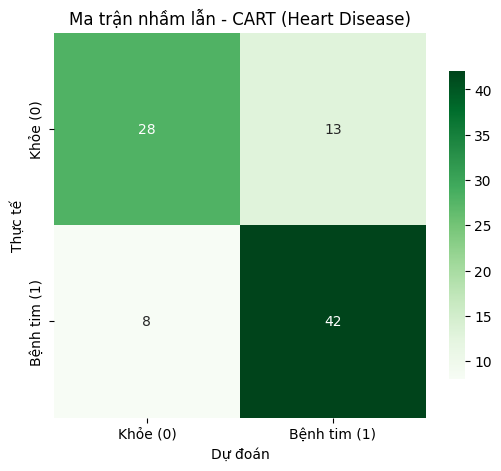


Báo cáo phân loại (CART):
              precision    recall  f1-score   support

        Khỏe       0.78      0.68      0.73        41
    Bệnh tim       0.76      0.84      0.80        50

    accuracy                           0.77        91
   macro avg       0.77      0.76      0.76        91
weighted avg       0.77      0.77      0.77        91


Cấu trúc cây CART (3 cấp đầu):
|--- thalassemia_2 <= 0.50
|   |--- st_depression <= 0.90
|   |   |--- cholesterol <= 240.50
|   |   |   |--- num_major_vessels_1 <= 0.50
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- num_major_vessels_1 >  0.50
|   |   |   |   |--- truncated branch of depth 3
|   |   |--- cholesterol >  240.50
|   |   |   |--- cholesterol <= 262.00
|   |   |   |   |--- class: 0
|   |   |   |--- cholesterol >  262.00
|   |   |   |   |--- truncated branch of depth 2
|   |--- st_depression >  0.90
|   |   |--- chest_pain_type_3 <= 0.50
|   |   |   |--- st_slope_2 <= 0.50
|   |   |   |   |--- truncated bran

In [12]:
'''
Lặp lại yêu cầu 7 đối với cây CART.
'''
cart_model = DecisionTreeClassifier(
    criterion='gini',       # CART
    random_state=42,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1
)

print("Đang huấn luyện cây CART...")
cart_model.fit(X_train, y_train)
print("Huấn luyện xong!")
print(f"→ Độ sâu cây: {cart_model.get_depth()}")
print(f"→ Số node lá: {cart_model.get_n_leaves()}")

y_pred_cart = cart_model.predict(X_test)

accuracy_cart = accuracy_score(y_test, y_pred_cart)
print(f"\nAccuracy của CART: {accuracy_cart:.4f} ({accuracy_cart*100:.2f}%)")

cm_cart = confusion_matrix(y_test, y_pred_cart)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_cart, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Khỏe (0)', 'Bệnh tim (1)'],
            yticklabels=['Khỏe (0)', 'Bệnh tim (1)'],
            cbar_kws={'shrink': 0.8})
plt.title('Ma trận nhầm lẫn - CART (Heart Disease)')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()

print("\nBáo cáo phân loại (CART):")
print(classification_report(y_test, y_pred_cart, target_names=['Khỏe', 'Bệnh tim'], zero_division=0))

print("\nCấu trúc cây CART (3 cấp đầu):")
text_tree_cart = tree.export_text(cart_model,
                                  feature_names=X_train.columns.tolist(),
                                  max_depth=3)
print(text_tree_cart)

Đã chuẩn hóa dữ liệu (StandardScaler) – dùng cho Naive Bayes

Đang huấn luyện Naïve Bayes (GaussianNB)...
Huấn luyện xong!

Accuracy của Naïve Bayes: 0.8132 (81.32%)


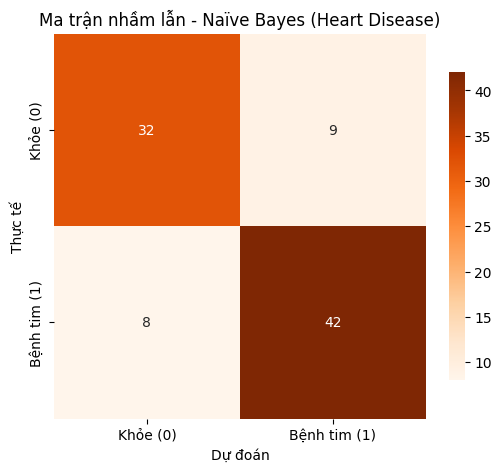


Báo cáo phân loại (Naïve Bayes):
              precision    recall  f1-score   support

        Khỏe       0.80      0.78      0.79        41
    Bệnh tim       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [13]:
'''
Xây dựng mô hình phân lớp bằng thuật toán Naïve Bayes và kiểm tra kết quả đạt
được.
'''
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

print("Đã chuẩn hóa dữ liệu (StandardScaler) – dùng cho Naive Bayes")

nb_model = GaussianNB()

print("\nĐang huấn luyện Naïve Bayes (GaussianNB)...")
nb_model.fit(X_train_scaled, y_train)
print("Huấn luyện xong!")

y_pred_nb = nb_model.predict(X_test_scaled)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"\nAccuracy của Naïve Bayes: {accuracy_nb:.4f} ({accuracy_nb*100:.2f}%)")

cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Khỏe (0)', 'Bệnh tim (1)'],
            yticklabels=['Khỏe (0)', 'Bệnh tim (1)'],
            cbar_kws={'shrink': 0.8})
plt.title('Ma trận nhầm lẫn - Naïve Bayes (Heart Disease)')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()

print("\nBáo cáo phân loại (Naïve Bayes):")
print(classification_report(y_test, y_pred_nb, target_names=['Khỏe', 'Bệnh tim'], zero_division=0))

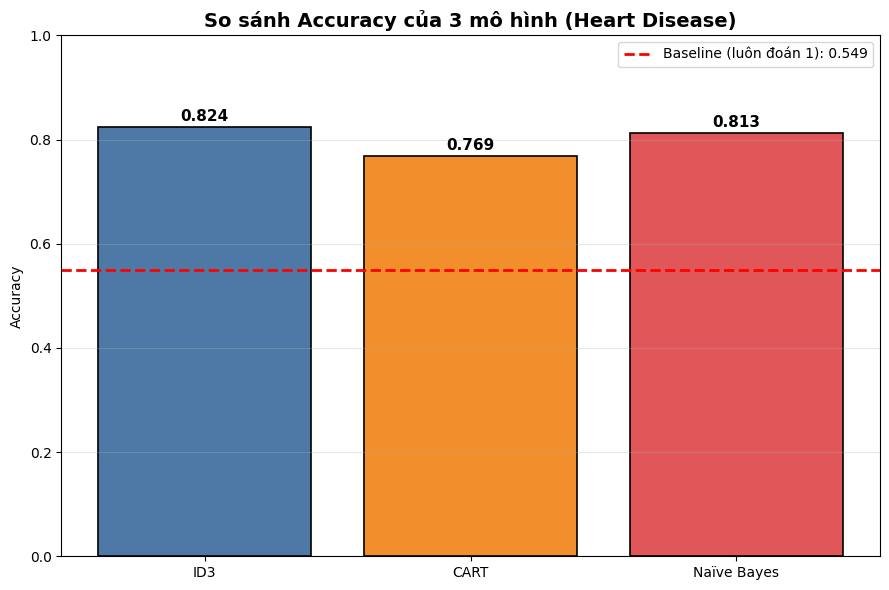

In [14]:
'''
So sánh kết quả của các mô hình trên.
'''
models = ['ID3', 'CART', 'Naïve Bayes']
accuracies = [accuracy_id3, accuracy_cart, accuracy_nb]
precisions = [precision_score(y_test, y_pred_id3, average='weighted', zero_division=0),
              precision_score(y_test, y_pred_cart, average='weighted', zero_division=0),
              precision_score(y_test, y_pred_nb, average='weighted', zero_division=0)]
recalls = [recall_score(y_test, y_pred_id3, average='weighted', zero_division=0),
           recall_score(y_test, y_pred_cart, average='weighted', zero_division=0),
           recall_score(y_test, y_pred_nb, average='weighted', zero_division=0)]
f1s = [f1_score(y_test, y_pred_id3, average='weighted'),
       f1_score(y_test, y_pred_cart, average='weighted'),
       f1_score(y_test, y_pred_nb, average='weighted')]

# Baseline: luôn đoán lớp 1 (bệnh tim)
baseline_acc = y_test.mean()

plt.figure(figsize=(9, 6))
bars = plt.bar(models, accuracies,
               color=['#4e79a7', '#f28e2b', '#e15759'],
               edgecolor='black', linewidth=1.2)

# Đường baseline
plt.axhline(y=baseline_acc, color='red', linestyle='--', linewidth=2,
            label=f'Baseline (luôn đoán 1): {baseline_acc:.3f}')

# Ghi số trên cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.005,
             f'{height:.3f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('So sánh Accuracy của 3 mô hình (Heart Disease)', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()